In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Class_Seeds.csv')

In [2]:
df.head()

,Area,Perimeter,Compactness,KernelLength,KernelWidth,AsymCoeff,KernelGrov_Length,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               210 non-null    float64
 1   Perimeter          210 non-null    float64
 2   Compactness        210 non-null    float64
 3   KernelLength       210 non-null    float64
 4   KernelWidth        210 non-null    float64
 5   AsymCoeff          210 non-null    float64
 6   KernelGrov_Length  210 non-null    float64
 7   Class              210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [4]:
# # drop kolom yang tidak diperlukan
# data = df.drop(columns=['User ID'])

# # jalankan proses one-hot encoding dengan pd.get_dummies()
# data = pd.get_dummies(data)
# data

In [5]:
# pisahkan atribut dan label
predictions = ['Area' , 'Perimeter' , 'Compactness' , 'KernelLength', 'KernelWidth', 'AsymCoeff', 'KernelGrov_Length']

X = df[predictions]
y = df['Class'] 

In [6]:
# lakukan normalisasi terhadap data yang kita miliki
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
scaled_data = pd.DataFrame(scaled_data, columns= X.columns)
scaled_data.head()

,Area,Perimeter,Compactness,KernelLength,KernelWidth,AsymCoeff,KernelGrov_Length
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356


In [7]:
from sklearn.model_selection import train_test_split

# bagi data menjadi train dan test untuk setiap atribut dan label
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=1)
print(len(y_test))

42


In [8]:
from sklearn import linear_model

# latih model dengan fungsi fit
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [9]:
#uji akurasi model
model.score(X_test, y_test)

1.0

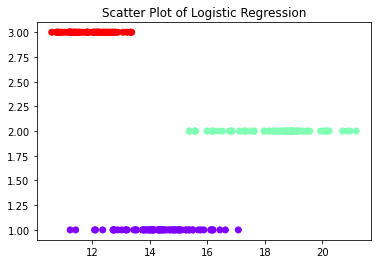

In [11]:
# Create a scatter plot

plt.scatter(X['Area'], y, c=y, cmap='rainbow')
plt.title('Scatter Plot of Logistic Regression')
plt.show()